C:\Users\kamil\AppData\Local\Temp\ipykernel_15228\2728765731.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\kamil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\kamil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\kamil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\kamil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!


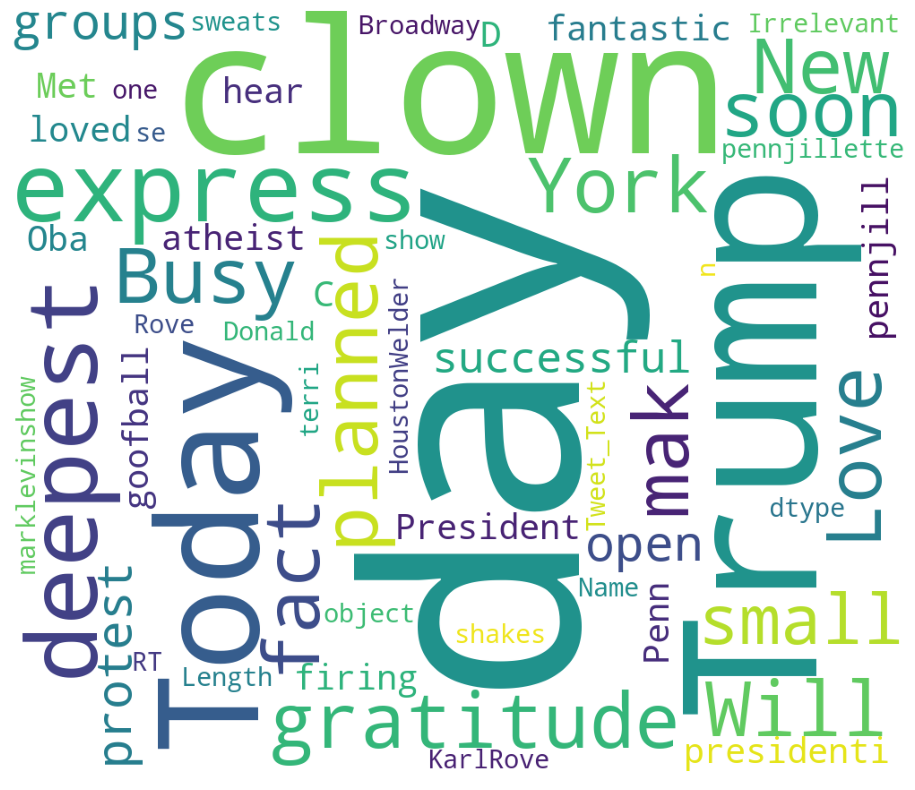

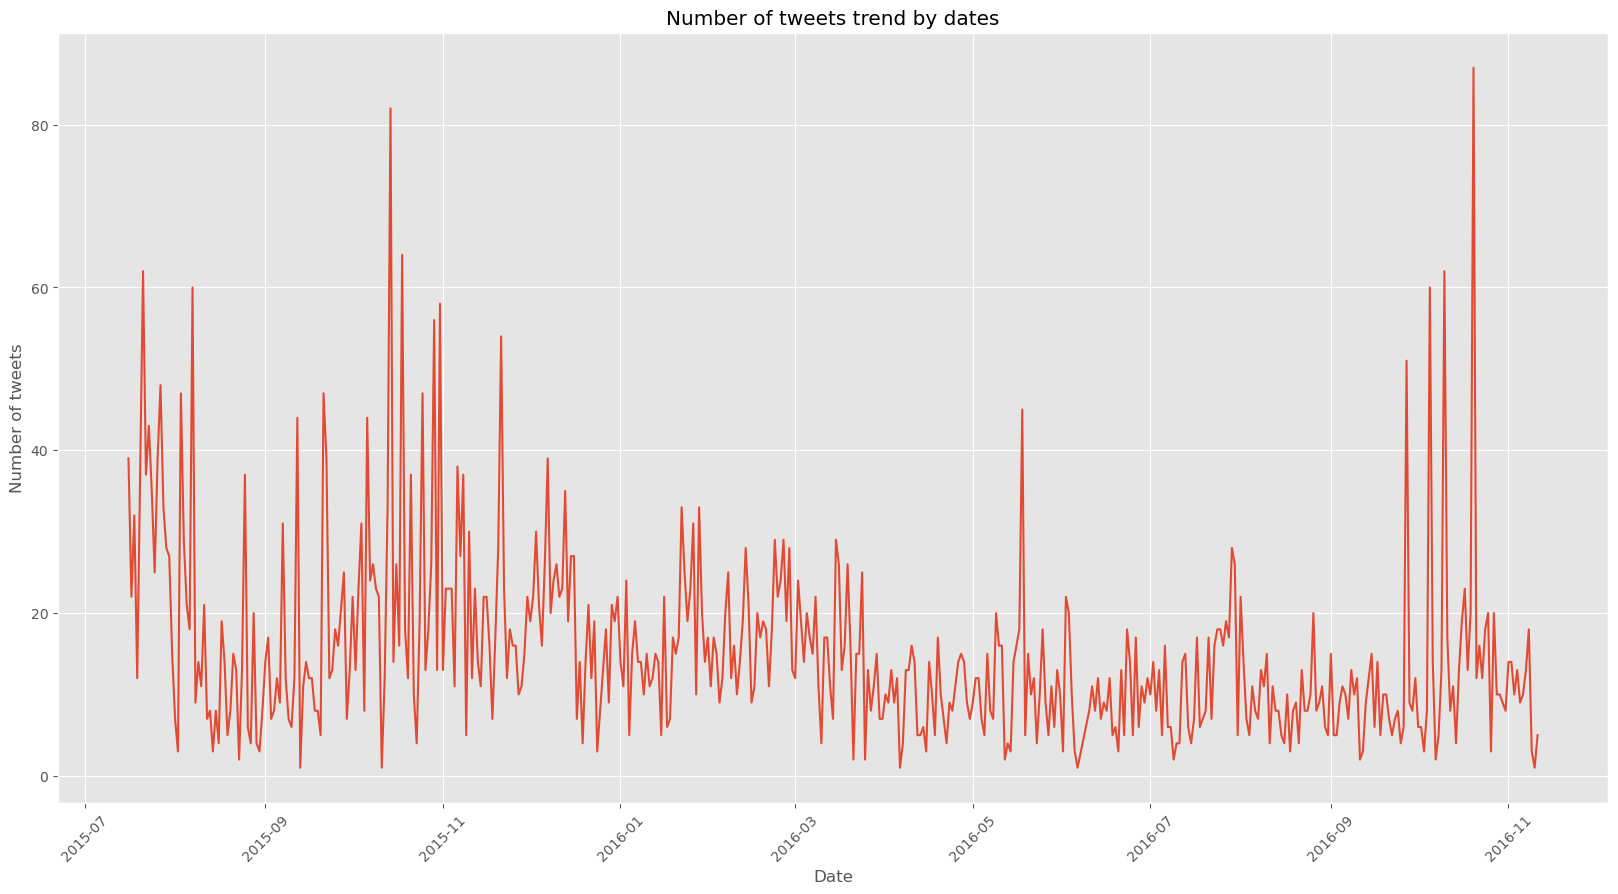

[[0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
  0 1 0 1 1]
 [0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1
  0 0 0 0 0]
 [1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
  1 0 1 1 0]]
{'twitter': 37, 'is': 12, 'one': 19, 'of': 18, 'the': 32, 'most': 16, 'important': 8, 'social': 31, 'media': 14, 'used': 39, 'intoday': 11, 'world': 40, 'it': 13, 'provides': 27, 'platform': 25, 'to': 35, 'share': 30, 'people': 22, 'opinions': 20, 'factsand': 5, 'information': 10, 'regarding': 28, 'person': 23, 'place': 24, 'animals': 1, 'or': 21, 'things': 34, 'these': 33, 'tweetsare': 36, 'by': 3, 'several': 29, 'private': 26, 'governmental': 6, 'and': 0, 'non': 17, 'governmentalorganizations': 7, 'mine': 15, 'different': 4, 'types': 38, 'including': 9, 'businessintelligence': 2}


<AxesSubplot:>

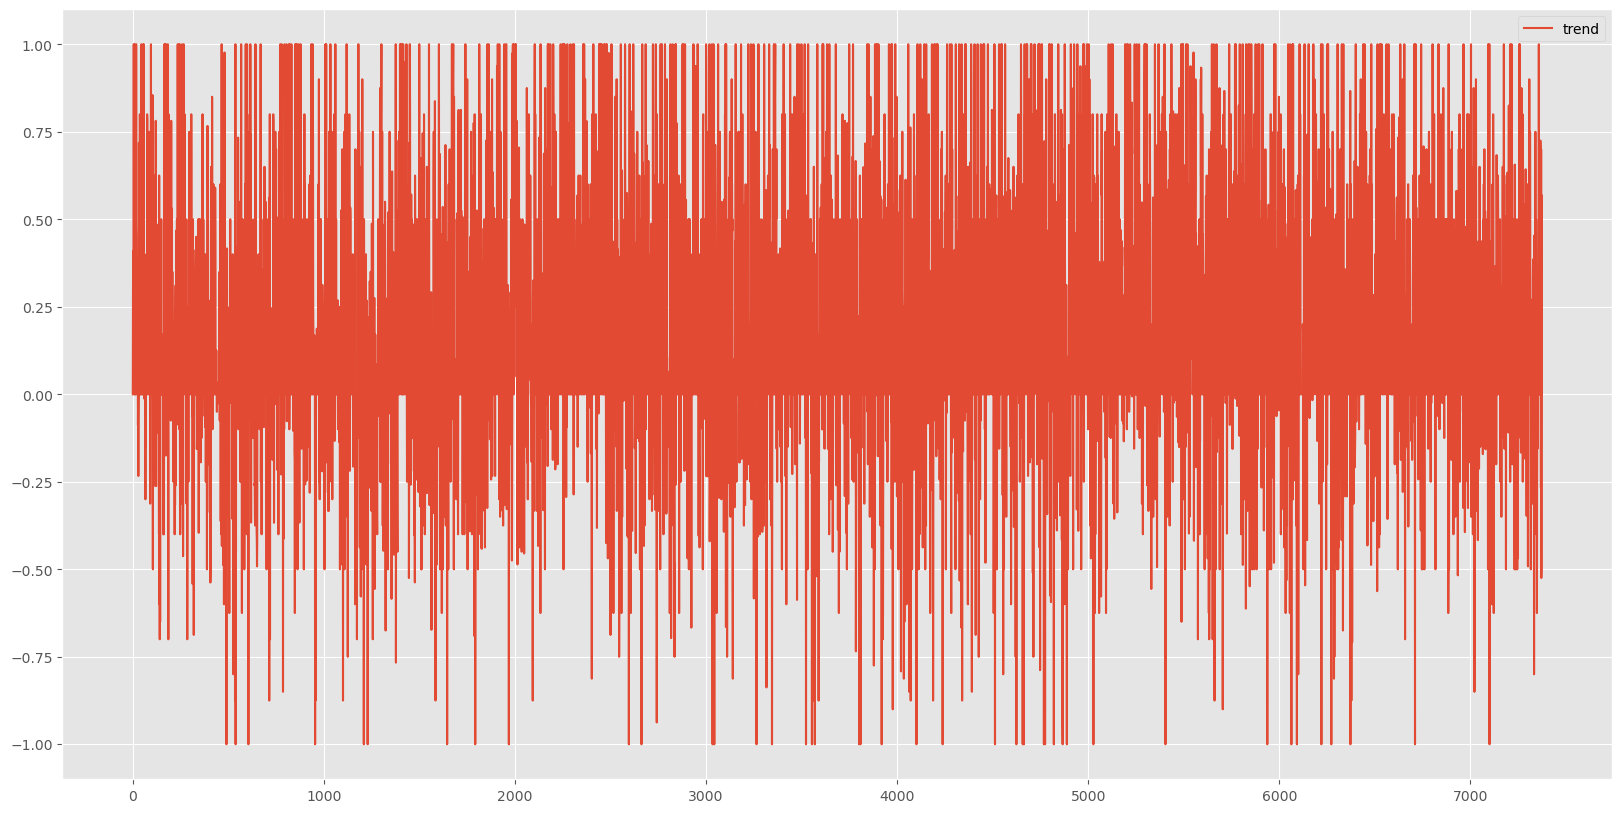

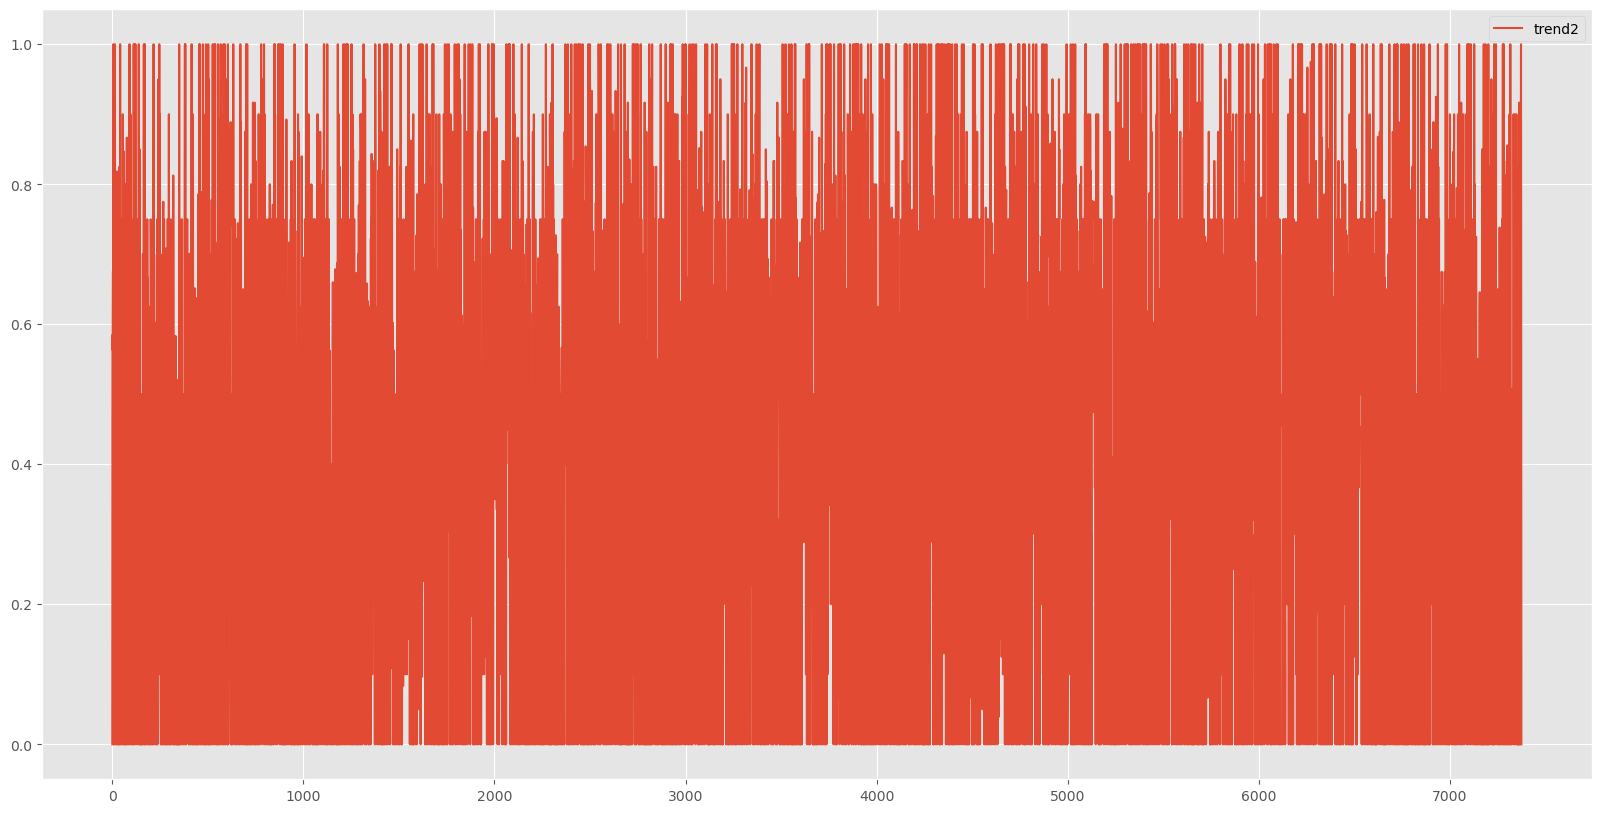

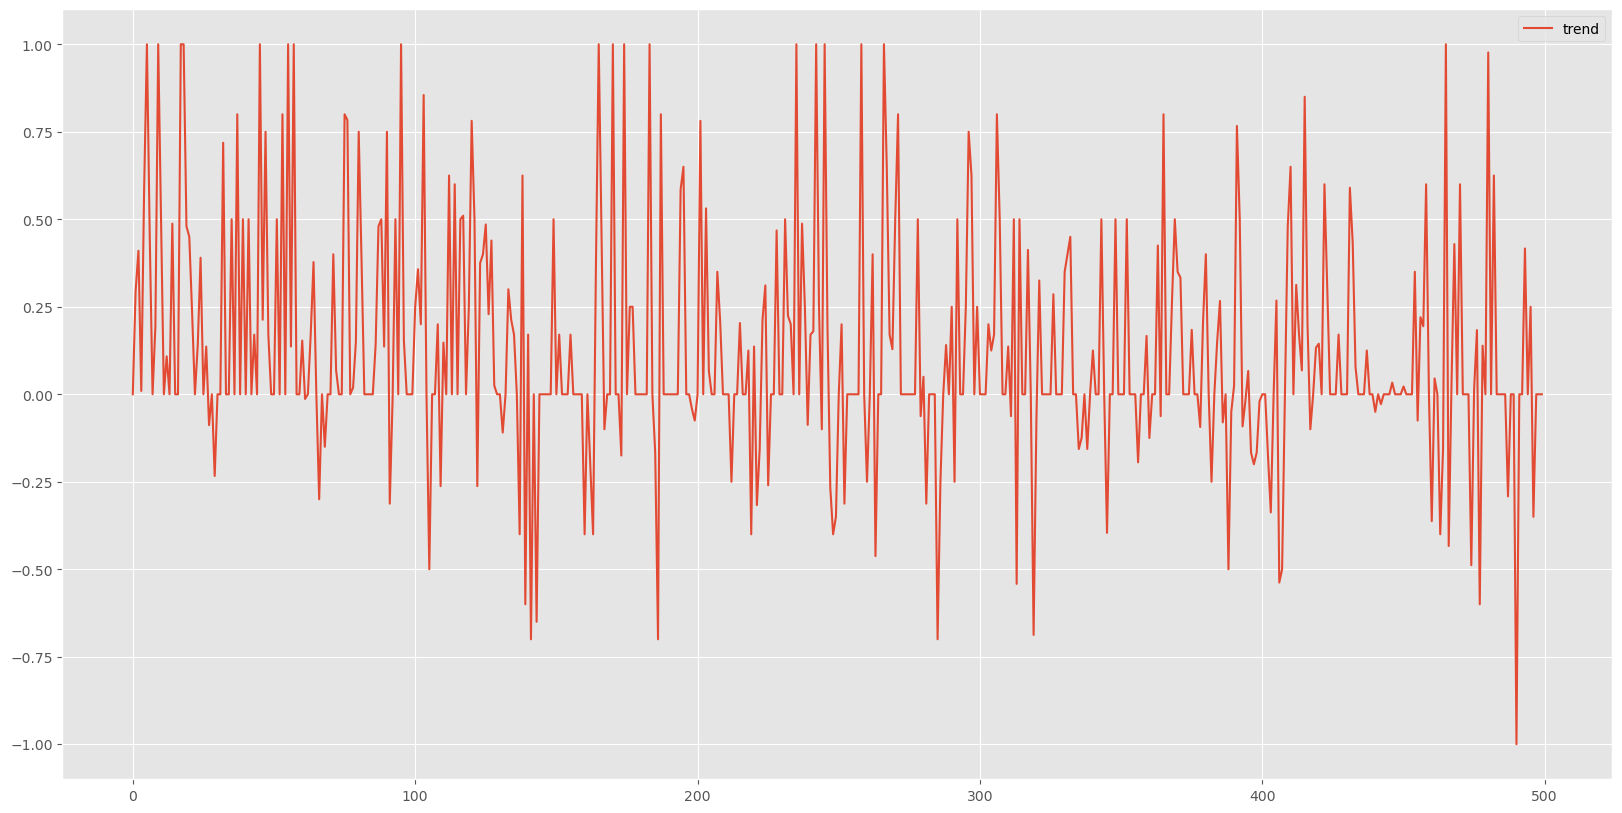

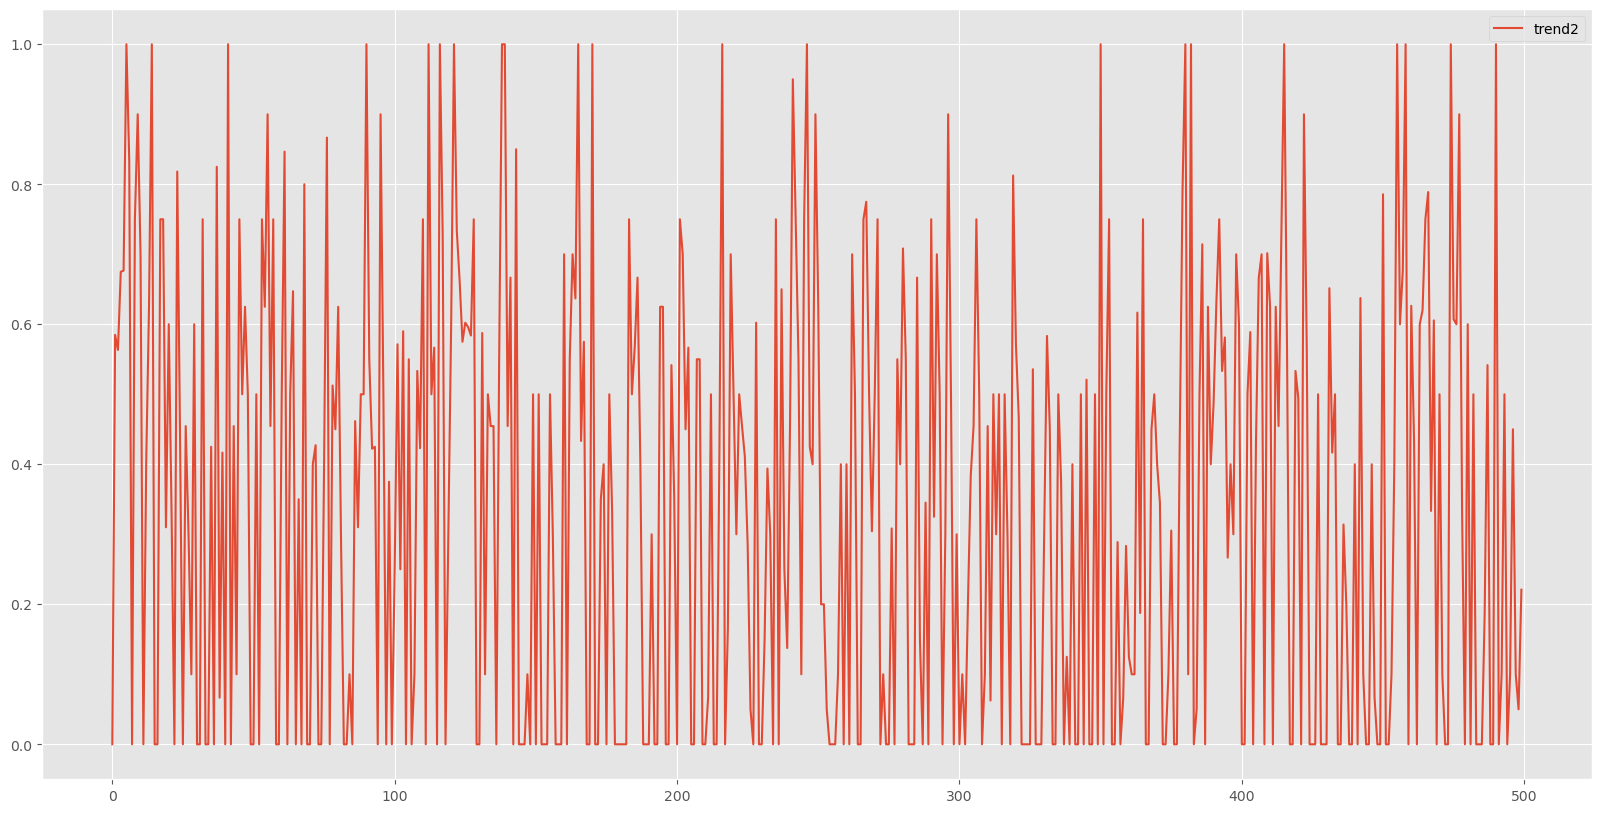

In [32]:
from textblob import TextBlob
import math
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
style.use('ggplot')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import sklearn
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('popular')
import nltk
nltk.download('brown')
from sklearn.feature_extraction.text import CountVectorizer
encoding='utf8'


#CSV uzantili tweet bilgilerinin oldugu dosyayi okuyup tweete' assign ettik
tweet= pd.read_csv(u'Donald-Tweets!.csv', index_col=None)
#tweet icerigine goz atmak icin .head() kullanildi
tweet.head(10)

#tweet_text indexindeki değerleri df'ye atadık daha sonra bu değeri string'e cevirip 
#text icine atadiktan sonra bu text'den resime dönüştürebileceğimiz wordCloud methodunu kullandık
df=tweet['Tweet_Text']
text=str(df)
wordcloud = WordCloud(background_color="white",width=1000, height=860,margin=2).generate(text)
#resim cizim size hizalama ekrana print etmek gibi gerekli seyler icin hazir kutuphaneler kullanildi
plt.imshow(wordcloud)
rcParams['figure.figsize'] = 20, 10
plt.axis("off")
plt.show()

#tweet bilgisini dataya attık daha sonra binevi destructring diyebileceğimiz ilgili indexteki columndaki değerleri
#ilgili degiskenlere atadik
data = tweet
time = data['Time']
tweets = data['Tweet_Text']
hashTag = data['Hashtags']
Retweets = data['Retweets']
hour_an = data.copy()
hour_an['Time'] = pd.to_datetime(data['Time'], yearfirst=True)
hour_an['Time'] = hour_an['Time'].dt.hour
#DataFrame, iki boyutlu veriler ve karşılık gelen etiketleri içeren bir yapıdır
hour_an =pd.DataFrame(hour_an.groupby(['Time']).size().sort_values(ascending=True).rename('Tweets'))
hour_an
#what about seeing his trend of sending tweets?
tweets_by_day = data.groupby('Date').count().reset_index()
tweets_by_day = tweets_by_day.sort_values(by='Date')
x = pd.to_datetime(tweets_by_day['Date'],yearfirst=True)
y =tweets_by_day['Time']
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.xticks(rotation=45)
plt.title('Number of tweets trend by dates')
plt.plot(x, y)
plt.show()
#Çalışması için import gerekli
text = TextBlob("Twitter is one of the most important social media used in"
+"today's world. It provides the platform to share people's opinions, facts"
+"and information regarding person, place, animals or things. These tweets"
+"are used by several private, governmental and non-governmental"
+"organizations to mine different types of information including business"
+"intelligence.")
#taglere ayırdık
text.tags
noun = text.noun_phrases
noun
#tokenization yaptık sadece sentences değil kütüphanenin içinde dahil olan veya kendi yöntemimizi implement edeceğimiz yöntemler
#de kullanabiliriz
text.sentences
text.words
text.word_counts['twitter']
#array declaration
corpus = []
len(text.sentences)
#once metni array icine atadik
for sentence in text.sentences:
    corpus.append(str(sentence))

    
#sonrasinda burada sayisal gosterime -binary format - çevirdik
vectorizer = CountVectorizer()
#hem sayisal gosterimini hem de text gösterimini print ettik
print( vectorizer.fit_transform(corpus).todense() )
print( vectorizer.vocabulary_ )

#bu satirda bir duzeltme yapiyordu TextBlobu TextBlob ile tekrar kullanmak yerine direkt atama yapmak sorunu çözdü
test=text
test.sentiment
test.sentiment.polarity
storage=[]
for i in range(len(df)):
 x=str(df[i])
 y=TextBlob(x)
 z=y.sentiment.polarity
 storage.append(z)

change=DataFrame({'trend':storage})
rcParams['figure.figsize'] = 20, 10
change.plot.line()

storage2=[]
for i in range(len(df)):
 x2=str(df[i])
 y2=TextBlob(x2)
 z2=y2.sentiment.subjectivity
 storage2.append(z2)

change2=DataFrame({'trend2':storage2})
rcParams['figure.figsize'] = 20, 10
change2.plot.line()


storage=[]
for i in range(500):
 x=str(df[i])
 y=TextBlob(x)
 z=y.sentiment.polarity
 storage.append(z)
change=DataFrame({'trend':storage})
rcParams['figure.figsize'] = 20, 10
change.plot.line()

storage2=[]
for i in range(500):
 x2=str(df[i])
 y2=TextBlob(x2)
 z2=y2.sentiment.subjectivity
 storage2.append(z2)
change2=DataFrame({'trend2':storage2})
rcParams['figure.figsize'] = 20, 10
change2.plot.line()




